# Data Workflow Lab 1

Clean and summarize Project 3 data.

### Learning Objectives

* Practice text cleaning techniques
* Practice datatype conversion
* Practice filling in missing values with either 0 or the average in the column
* Practice categorical data techniques
* Transform data into usable quantities


In [1]:
% matplotlib inline
import datetime
import numpy as np
import pandas as pd

In [2]:
# Load the data
df = pd.read_csv("Iowa_Liquor_sales_sample_10pct.csv")
print df.columns
df.head()

Index([u'Date', u'Store Number', u'City', u'Zip Code', u'County Number',
       u'County', u'Category', u'Category Name', u'Vendor Number',
       u'Item Number', u'Item Description', u'Bottle Volume (ml)',
       u'State Bottle Cost', u'State Bottle Retail', u'Bottles Sold',
       u'Sale (Dollars)', u'Volume Sold (Liters)', u'Volume Sold (Gallons)'],
      dtype='object')


,Date,Store Number,City,Zip Code,County Number,County,Category,Category Name,Vendor Number,Item Number,Item Description,Bottle Volume (ml),State Bottle Cost,State Bottle Retail,Bottles Sold,Sale (Dollars),Volume Sold (Liters),Volume Sold (Gallons)
0,11/04/2015,3717,SUMNER,50674,9.0,Bremer,1051100.0,APRICOT BRANDIES,55,54436,Mr. Boston Apricot Brandy,750,$4.50,$6.75,12,$81.00,9.0,2.38
1,03/02/2016,2614,DAVENPORT,52807,82.0,Scott,1011100.0,BLENDED WHISKIES,395,27605,Tin Cup,750,$13.75,$20.63,2,$41.26,1.5,0.40
2,02/11/2016,2106,CEDAR FALLS,50613,7.0,Black Hawk,1011200.0,STRAIGHT BOURBON WHISKIES,65,19067,Jim Beam,1000,$12.59,$18.89,24,$453.36,24.0,6.34
3,02/03/2016,2501,AMES,50010,85.0,Story,1071100.0,AMERICAN COCKTAILS,395,59154,1800 Ultimate Margarita,1750,$9.50,$14.25,6,$85.50,10.5,2.77
4,08/18/2015,3654,BELMOND,50421,99.0,Wright,1031080.0,VODKA 80 PROOF,297,35918,Five O'clock Vodka,1750,$7.20,$10.80,12,$129.60,21.0,5.55


## Clean the data

Let's practice our data cleaning skills on the Project 3 dataset. If you don't remember how to do any of these tasks, look back at your work from the previous weeks or search the internet. There are many blog articles and Stack Overflow posts that cover these topics.

You'll want to complete at least the following tasks:
* Remove redundant columns
* Remove "$" prices from characters and convert values to floats.
* Convert dates to pandas datetime objects
* Convert category floats to integers
* Drop or fill in bad values

In [3]:
# Remove $ from certain columns
def dollars_to_float(x):
    if type(x) != type(''):
        return x
    if x[0] == '$':
        x = x[1:]
    return float(x)

df['State_Bottle_Cost'] = df["State Bottle Cost"].map(dollars_to_float)
df['State_Bottle_Retail'] = df["State Bottle Retail"].map(dollars_to_float)
df['Dollars'] = df["Sale (Dollars)"].map(dollars_to_float)

df[['State_Bottle_Cost','State_Bottle_Retail','Dollars']]

,State_Bottle_Cost,State_Bottle_Retail,Dollars
0,4.50,6.75,81.00
1,13.75,20.63,41.26
2,12.59,18.89,453.36
3,9.50,14.25,85.50
4,7.20,10.80,129.60
5,13.32,19.98,119.88
6,6.66,9.99,29.97
7,15.75,23.63,47.26
8,11.49,17.24,68.96
9,7.62,11.43,22.86


In [4]:
# Convert dates
df['Sale_Date'] = pd.to_datetime(format="%m/%d/%Y", arg=df.Date)
df.Sale_Date

0        2015-11-04
1        2016-03-02
2        2016-02-11
3        2016-02-03
4        2015-08-18
5        2015-04-20
6        2015-08-05
7        2015-06-25
8        2016-01-04
9        2015-11-10
10       2015-09-28
11       2015-10-28
12       2015-01-22
13       2016-02-29
14       2016-01-04
15       2015-06-10
16       2016-02-25
17       2015-12-29
18       2015-12-26
19       2015-03-04
20       2015-01-16
21       2015-01-13
22       2015-03-24
23       2015-11-12
24       2016-03-14
25       2015-02-03
26       2015-11-23
27       2015-04-21
28       2015-12-01
29       2015-01-14
            ...    
270925   2015-01-05
270926   2015-12-26
270927   2015-08-31
270928   2015-10-07
270929   2016-01-25
270930   2015-10-13
270931   2015-05-26
270932   2015-06-18
270933   2015-02-26
270934   2015-03-18
270935   2015-06-08
270936   2015-03-31
270937   2015-01-27
270938   2015-04-29
270939   2015-05-04
270940   2015-01-21
270941   2015-02-09
270942   2015-06-15
270943   2015-10-21


In [5]:
# Drop or replace bad values
df.isnull().any()

Date                     False
Store Number             False
City                     False
Zip Code                 False
County Number             True
County                    True
Category                  True
Category Name             True
Vendor Number            False
Item Number              False
Item Description         False
Bottle Volume (ml)       False
State Bottle Cost        False
State Bottle Retail      False
Bottles Sold             False
Sale (Dollars)           False
Volume Sold (Liters)     False
Volume Sold (Gallons)    False
State_Bottle_Cost        False
State_Bottle_Retail      False
Dollars                  False
Sale_Date                False
dtype: bool

In [6]:
df.Category.isnull().value_counts()

False    270887
True         68
Name: Category, dtype: int64

In [7]:
df.County.isnull().value_counts()

False    269878
True       1077
Name: County, dtype: int64

In [8]:
df.dropna(inplace=True)
df.isnull().any()

Date                     False
Store Number             False
City                     False
Zip Code                 False
County Number            False
County                   False
Category                 False
Category Name            False
Vendor Number            False
Item Number              False
Item Description         False
Bottle Volume (ml)       False
State Bottle Cost        False
State Bottle Retail      False
Bottles Sold             False
Sale (Dollars)           False
Volume Sold (Liters)     False
Volume Sold (Gallons)    False
State_Bottle_Cost        False
State_Bottle_Retail      False
Dollars                  False
Sale_Date                False
dtype: bool

In [9]:
# Convert integers
df.dtypes

Date                             object
Store Number                      int64
City                             object
Zip Code                         object
County Number                   float64
County                           object
Category                        float64
Category Name                    object
Vendor Number                     int64
Item Number                       int64
Item Description                 object
Bottle Volume (ml)                int64
State Bottle Cost                object
State Bottle Retail              object
Bottles Sold                      int64
Sale (Dollars)                   object
Volume Sold (Liters)            float64
Volume Sold (Gallons)           float64
State_Bottle_Cost               float64
State_Bottle_Retail             float64
Dollars                         float64
Sale_Date                datetime64[ns]
dtype: object

In [10]:
# Remove redundant columns
df.drop(axis=1,
        labels=['State Bottle Cost', 
                'State Bottle Retail',
                'Sale (Dollars)',
                'Volume Sold (Gallons)'],
        inplace=True)
df.dtypes

Date                            object
Store Number                     int64
City                            object
Zip Code                        object
County Number                  float64
County                          object
Category                       float64
Category Name                   object
Vendor Number                    int64
Item Number                      int64
Item Description                object
Bottle Volume (ml)               int64
Bottles Sold                     int64
Volume Sold (Liters)           float64
State_Bottle_Cost              float64
State_Bottle_Retail            float64
Dollars                        float64
Sale_Date               datetime64[ns]
dtype: object

## Filter the Data

Some stores may have opened or closed in 2015. These data points will heavily skew our models, so we need to filter them out or find a way to deal with them.

You'll need to provide a summary in your project report about these data points. You may also consider using the monthly sales in your model and including other information (number of months or days each store is open) in your data to handle these unusual cases.

Let's record the first and last sales dates for each store. We'll save this information for later when we fit our models.

In [29]:
# Determine which stores were open all of 2015 and all of Q1 2016
# Find the first and last sales date.
import datetime
df2015 = df[df.Sale_Date.between(datetime.datetime(2015,1,1),
                                 datetime.datetime(2016,3,31))
]
earliest_and_latest = df2015.pivot_table(
 index='Store Number',
 values='Sale_Date',
 aggfunc={'Sale_Date': {'First_Sale' : min, 
                        "Last_Sale" : max}
          }
)

long_term_stores = earliest_and_latest[
((earliest_and_latest.First_Sale < datetime.datetime(2015,1,15)) &
 (earliest_and_latest.Last_Sale > datetime.datetime(2016,3,15)))
]

long_term_stores

# Filter out stores that opened or closed throughout the year
# You may want to save this step until you start modelling

sales_from_long_term_stores = df2015.merge(long_term_stores,
                                           left_on="Store Number",
                                           right_index=True).copy()
sales_from_long_term_stores

Date                    False
Store Number            False
City                    False
Zip Code                False
County Number           False
County                  False
Category                False
Category Name           False
Vendor Number           False
Item Number             False
Item Description        False
Bottle Volume (ml)      False
Bottles Sold            False
Volume Sold (Liters)    False
State_Bottle_Cost       False
State_Bottle_Retail     False
Dollars                 False
Sale_Date               False
First_Sale              False
Last_Sale               False
dtype: bool

In [12]:
sales_from_long_term_stores[sales_from_long_term_stores['Store Number'] == 5180]

,Date,Store Number,City,Zip Code,County Number,County,Category,Category Name,Vendor Number,Item Number,Item Description,Bottle Volume (ml),Bottles Sold,Volume Sold (Liters),State_Bottle_Cost,State_Bottle_Retail,Dollars,Sale_Date,First_Sale,Last_Sale


## Compute New Columns and Tables

Since we're trying to predict sales and/or profits, we'll want to compute some intermediate data. There are a lot of ways to do this and good use of pandas is crucial. For example, for each transaction we may want to know:
* margin, retail cost minus bottle cost
* price per bottle
* price per liter

We'll need to make a new dataframe that indexes quantities by store:
* sales per store for all of 2015
* sales per store for Q1 2015
* sales per store for Q1 2016
* total volumes sold
* mean transaction revenue, gross margin, price per bottle, price per liter, etc.
* average sales per day
* number of days open

Make sure to retain other variables that we'll want to use to build our models, such as zip code, county number, city, etc. We recommend that you spend some time thinking about the model you may want to fit and computing enough of the suggested quantities to give you a few options.

Bonus tasks:
* Restrict your attention to stores that were open for all of 2015 and Q1 2016. Stores that opened or closed in 2015 will introduce outliers into your data.
* For each transaction we have the item category. You may be able to determine the store type (primarily wine, liquor, all types of alcohol, etc.) by the most common transaction category for each store. This could be a useful categorical variable for modelling. 

In [13]:
# Margin and Price per liter
sales_from_long_term_stores['Margin'] = (
  sales_from_long_term_stores.State_Bottle_Retail - 
  sales_from_long_term_stores.State_Bottle_Cost
)
sales_from_long_term_stores['MarginRatio'] = (
  sales_from_long_term_stores.Margin / 
  sales_from_long_term_stores.State_Bottle_Retail
)
sales_from_long_term_stores['Price_per_Litre'] = (
  sales_from_long_term_stores.State_Bottle_Retail / 
  sales_from_long_term_stores["Volume Sold (Liters)"]
)
sales_from_long_term_stores.columns


Index([u'Date', u'Store Number', u'City', u'Zip Code', u'County Number',
       u'County', u'Category', u'Category Name', u'Vendor Number',
       u'Item Number', u'Item Description', u'Bottle Volume (ml)',
       u'Bottles Sold', u'Volume Sold (Liters)', u'State_Bottle_Cost',
       u'State_Bottle_Retail', u'Dollars', u'Sale_Date', u'First_Sale',
       u'Last_Sale', u'Margin', u'MarginRatio', u'Price_per_Litre'],
      dtype='object')

In [14]:
# Sales per store, 2015

sales2015 = sales_from_long_term_stores[
  sales_from_long_term_stores.Sale_Date.between(
    datetime.datetime(2015,1,1),
    datetime.datetime(2015,12,31)
  )
].copy()


def day_of_week(x):
    return x.strftime("%a")
sales2015['day_of_sale'] = sales2015.Sale_Date.map(day_of_week)

In [15]:
sales_per_store2015 = sales2015.pivot_table(
  index=["Store Number","Zip Code", "City", "County Number"],
  values=["Dollars", "Volume Sold (Liters)", "Margin", "MarginRatio",
         "Price_per_Liter", "Sale_Date", "day_of_sale"],
  aggfunc={
     "Dollars" : { "TotalDollars2015"  : sum,
                   "AverageDollars2015" : np.mean,
                   "NumberOfSales2015" : len},
     "Volume Sold (Liters)" : {
                    "TotalVolume2015": sum,
                    "AverageVolume2015": np.mean
     },
     "Margin": {"Mean2015": np.mean},
     "MarginRatio": {"Median2015": np.median},
     "Sale_Date" : { "DaysOpenTemp": pd.Series.nunique },
     "day_of_sale":  { "DaysOpenTemp": pd.Series.nunique }
}
)

sales_per_store2015['DaysOpen'] = sales_per_store2015[("day_of_sale",'DaysOpenTemp')].astype(int)
sales_per_store2015['AverageSalesPerDay'] = (
   sales_per_store2015[("Dollars", "NumberOfSales2015")] / 
   (sales_per_store2015.DaysOpen*52)
)

sales_per_store2015.head()

Margin            Dollars  \
                                                 Mean2015 AverageDollars2015   
Store Number Zip Code City        County Number                                
2106         50613    CEDAR FALLS 7.0            5.160951         277.640114   
2113         50543    GOWRIE      94.0           5.445102          63.334830   
2130         50703    WATERLOO    7.0            4.918005         285.380844   
2178         52172    WAUKON      3.0            4.868861         102.633671   
2190         50314    DES MOINES  77.0           5.774259          92.539209   

                                                                   \
                                                NumberOfSales2015   
Store Number Zip Code City        County Number                     
2106         50613    CEDAR FALLS 7.0                       526.0   
2113         50543    GOWRIE      94.0                      147.0   
2130         50703    WATERLOO    7.0                       391.0   
2178         52172    WAUKON      3.0                       237.0   
2190         50314    DES MOINES  77.0                     1315.0   

                                                                  \
                                                TotalDollars2015   
Store Number Zip Code City        County Number                    
2106         50613    CEDAR FALLS 7.0                  146038.70   
2113         50543    GOWRIE      94.0                   9310.22   
2130         50703    WATERLOO    7.0                  111583.91   
2178         52172    WAUKON      3.0                   24324.18   
2190         50314    DES MOINES  77.0                 121689.06   

                                                                    Sale_Date  \
                                                                 DaysOpenTemp   
Store Number Zip Code City        County Number                                 
2106         50613    CEDAR FALLS 7.0           1970-01-01 00:00:00.000000052   
2113         50543    GOWRIE      94.0          1970-01-01 00:00:00.000000047   
2130         50703    WATERLOO    7.0           1970-01-01 00:00:00.000000052   
2178         52172    WAUKON      3.0           1970-01-01 00:00:00.000000051   
2190         50314    DES MOINES  77.0          1970-01-01 00:00:00.000000169   

                                                Volume Sold (Liters)  \
                                                   AverageVolume2015   
Store Number Zip Code City        County Number                        
2106         50613    CEDAR FALLS 7.0                      18.478802   
2113         50543    GOWRIE      94.0                      4.488776   
2130         50703    WATERLOO    7.0                      17.594297   
2178         52172    WAUKON      3.0                       8.089114   
2190         50314    DES MOINES  77.0                      4.807734   

                                                                MarginRatio  \
                                                TotalVolume2015  Median2015   
Store Number Zip Code City        County Number                               
2106         50613    CEDAR FALLS 7.0                   9719.85    0.333333   
2113         50543    GOWRIE      94.0                   659.85    0.333333   
2130         50703    WATERLOO    7.0                   6879.37    0.333333   
2178         52172    WAUKON      3.0                   1917.12    0.333333   
2190         50314    DES MOINES  77.0                  6322.17    0.333333   

                                                 day_of_sale DaysOpen  \
                                                DaysOpenTemp            
Store Number Zip Code City        County Number                         
2106         50613    CEDAR FALLS 7.0                      3        3   
2113         50543    GOWRIE      94.0                     3        3   
2130         50703    WATERLOO    7.0                      3        3   
2178         52

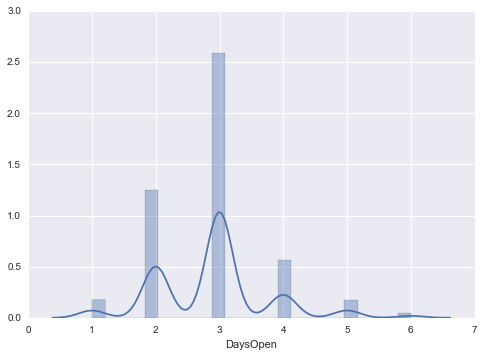

In [16]:
import seaborn
seaborn.distplot(sales_per_store2015.DaysOpen)

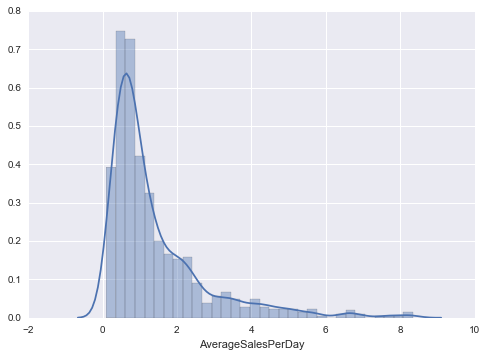

In [17]:

seaborn.distplot(sales_per_store2015.AverageSalesPerDay)

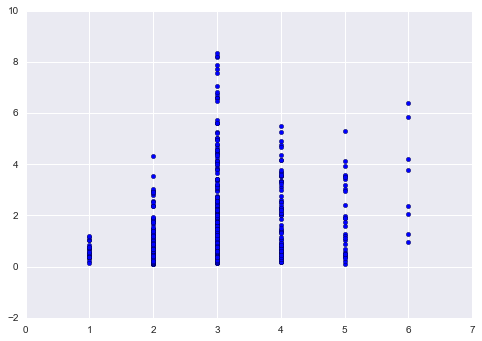

In [18]:
import matplotlib.pyplot
matplotlib.pyplot.scatter(sales_per_store2015.DaysOpen,
sales_per_store2015.AverageSalesPerDay)

In [19]:
# Q1 sales, may want to also use aggregate as above to have more columns (means, etc.)

# Sales 2015  Q1

sales2015q1 = sales_from_long_term_stores[
  sales_from_long_term_stores.Sale_Date.between(
    datetime.datetime(2015,1,1),
    datetime.datetime(2015,3,31)
  )
]

sales_per_store2015q1 = sales2015q1.pivot_table(
  index=["Store Number","Zip Code", "City", "County Number"],
  values=["Dollars", "Volume Sold (Liters)", "Margin", "MarginRatio",
         "Price_per_Liter"],
  aggfunc={
     "Dollars" : { "TotalDollars2015q1"  : sum,
                   "AverageDollars2015q1" : np.mean},
     "Volume Sold (Liters)" : {
                    "TotalVolume2015q1": sum,
                    "AverageVolume2015q1": np.mean
     },
     "Margin": {"Mean2015q1": np.mean},
     "MarginRatio" :{ "Median2015q1": np.median}
  }
)

sales_per_store2015q1.head()


MarginRatio  \
                                                Median2015q1   
Store Number Zip Code City        County Number                
2106         50613    CEDAR FALLS 7.0               0.333333   
2113         50543    GOWRIE      94.0              0.333333   
2130         50703    WATERLOO    7.0               0.333333   
2178         52172    WAUKON      3.0               0.333485   
2190         50314    DES MOINES  77.0              0.333333   

                                                             Dollars  \
                                                AverageDollars2015q1   
Store Number Zip Code City        County Number                        
2106         50613    CEDAR FALLS 7.0                     304.552636   
2113         50543    GOWRIE      94.0                     67.458333   
2130         50703    WATERLOO    7.0                     278.995057   
2178         52172    WAUKON      3.0                     122.008542   
2190         50314    DES MOINES  77.0                     84.878732   

                                                                       Margin  \
                                                TotalDollars2015q1 Mean2015q1   
Store Number Zip Code City        County Number                                 
2106         50613    CEDAR FALLS 7.0                     39287.29   5.033721   
2113         50543    GOWRIE      94.0                     2833.25   5.275000   
2130         50703    WATERLOO    7.0                     24272.57   5.140920   
2178         52172    WAUKON      3.0                      5856.41   4.932083   
2190         50314    DES MOINES  77.0                    29452.92   5.468040   

                                                Volume Sold (Liters)  \
                                                 AverageVolume2015q1   
Store Number Zip Code City        County Number                        
2106         50613    CEDAR FALLS 7.0                      19.582171   
2113         50543    GOWRIE      94.0                      4.216905   
2130         50703    WATERLOO    7.0                      16.635057   
2178         52172    WAUKON      3.0                       8.537708   
2190         50314    DES MOINES  77.0                      4.802824   

                                                                   
                                                TotalVolume2015q1  
Store Number Zip Code City        County Number                    
2106         50613    CEDAR FALLS 7.0                     2526.10  
2113         50543    GOWRIE      94.0                     177.11  
2130         50703    WATERLOO    7.0                     1447.25  
2178         52172    WAUKON      3.0                      409.81  
2190         50314    DES MOINES  77.0                    1666.58

In [20]:
# Sales 2016 Q1

sales2016q1 = sales_from_long_term_stores[
  sales_from_long_term_stores.Sale_Date.between(
    datetime.datetime(2016,1,1),
    datetime.datetime(2016,3,31)
  )
]

sales_per_store2016q1 = sales2016q1.pivot_table(
  index=["Store Number","Zip Code", "City", "County Number"],
  values=["Dollars", "Volume Sold (Liters)", "Margin", "MarginRatio",
         "Price_per_Liter"],
  aggfunc={
     "Dollars" : { "TotalDollars2016q1"  : sum,
                   "AverageDollars2016q1" : np.mean},
     "Volume Sold (Liters)" : {
                    "TotalVolume2016q1": sum,
                    "AverageVolume2016q1": np.mean
     },
     "Margin": {"Mean2016q1": np.mean},
     "MarginRatio" :{ "Median2016q1": np.median}
  }
)

sales_per_store2016q1.head()

MarginRatio  \
                                                Median2016q1   
Store Number Zip Code City        County Number                
2106         50613    CEDAR FALLS 7.0               0.333478   
2113         50543    GOWRIE      94.0              0.333482   
2130         50703    WATERLOO    7.0               0.333333   
2178         52172    WAUKON      3.0               0.333481   
2190         50314    DES MOINES  77.0              0.333333   

                                                             Dollars  \
                                                AverageDollars2016q1   
Store Number Zip Code City        County Number                        
2106         50613    CEDAR FALLS 7.0                     241.894841   
2113         50543    GOWRIE      94.0                     55.835135   
2130         50703    WATERLOO    7.0                     238.086410   
2178         52172    WAUKON      3.0                      96.353448   
2190         50314    DES MOINES  77.0                    106.010200   

                                                                       Margin  \
                                                TotalDollars2016q1 Mean2016q1   
Store Number Zip Code City        County Number                                 
2106         50613    CEDAR FALLS 7.0                     30478.75   5.196508   
2113         50543    GOWRIE      94.0                     2065.90   5.367838   
2130         50703    WATERLOO    7.0                     27856.11   5.312222   
2178         52172    WAUKON      3.0                      5588.50   4.648966   
2190         50314    DES MOINES  77.0                    31803.06   6.378900   

                                                Volume Sold (Liters)  \
                                                 AverageVolume2016q1   
Store Number Zip Code City        County Number                        
2106         50613    CEDAR FALLS 7.0                      16.795635   
2113         50543    GOWRIE      94.0                      4.783784   
2130         50703    WATERLOO    7.0                      13.306838   
2178         52172    WAUKON      3.0                       8.979310   
2190         50314    DES MOINES  77.0                      4.823700   

                                                                   
                                                TotalVolume2016q1  
Store Number Zip Code City        County Number                    
2106         50613    CEDAR FALLS 7.0                     2116.25  
2113         50543    GOWRIE      94.0                     177.00  
2130         50703    WATERLOO    7.0                     1556.90  
2178         52172    WAUKON      3.0                      520.80  
2190         50314    DES MOINES  77.0                    1447.11

Proceed with any calculations that you need for your models, such as grouping
sales by zip code, most common vendor number per store, etc. Once you have finished adding columns, be sure to save the dataframe.

In [21]:
# Merge!

temp_dataframe = sales_per_store2015.merge(sales_per_store2015q1,
                                           left_index=True,
                                           right_index=True)
analysis_dataframe = temp_dataframe.merge(sales_per_store2016q1,
                                          left_index=True,
                                          right_index=True
                                          )
analysis_dataframe

Margin  \
                                                     Mean2015   
Store Number Zip Code City            County Number             
2106         50613    CEDAR FALLS     7.0            5.160951   
2113         50543    GOWRIE          94.0           5.445102   
2130         50703    WATERLOO        7.0            4.918005   
2178         52172    WAUKON          3.0            4.868861   
2190         50314    DES MOINES      77.0           5.774259   
2191         52632    KEOKUK          56.0           5.778087   
2200         50583    SAC CITY        81.0           5.620868   
2228         50273    WINTERSET       61.0           4.875417   
2233         51360    SPIRIT LAKE     30.0           5.862116   
2248         50312    DES MOINES      77.0           7.534739   
2285         52240    IOWA CITY       52.0           6.829608   
2290         50588    STORM LAKE      11.0           5.281498   
2327         50841    CORNING         2.0            5.099841   
2413         52001    DUBUQUE         31.0           5.026549   
2445         51560    OAKLAND         78.0           4.949474   
2448         50125    INDIANOLA       91.0           5.049148   
2459         50115    GUTHRIE CENTER  39.0           4.026204   
2465         52003    DUBUQUE         31.0           5.897928   
2475         50597    WEST BEND       55.0           5.630676   
2478         50009    ALTOONA         77.0           7.013721   
2498         50606    ARLINGTON       33.0           3.105517   
2500         50010    AMES            85.0           5.211264   
2501         50010    AMES            85.0           5.003607   
2502         50021    ANKENY          77.0           5.633485   
2505         50036    BOONE           8.0            4.540980   
2506         52601    BURLINGTON      29.0           5.753790   
2507         52601    BURLINGTON      29.0           3.892209   
2508         52405    CEDAR RAPIDS    57.0           5.068968   
2509         52404    CEDAR RAPIDS    57.0           4.569465   
2512         52240    IOWA CITY       52.0           5.473847   
...                                                       ...   
5010         50583    SAC CITY        81.0           4.056457   
5011         52361    WILLIAMSBURG    48.0           4.619000   
5012         50220    PERRY           8.0            5.125921   
5017         52151    LANSING         3.0            4.137373   
5018         52802    DAVENPORT       82.0           3.693247   
5025         52403    CEDAR RAPIDS    57.0           1.667222   
5029         52806    DAVENPORT       82.0           5.100370   
5034         50401    MASON CITY      17.0           4.093920   
5037         50129    JEFFERSON       37.0           6.146231   
5040         52778    WILTON          70.0           3.364737   
5042         52001    DUBUQUE         31.0           4.045000   
5043         50702    WATERLOO        7.0            2.975862   
5045         51103    SIOUX CITY      97.0           3.795714   
5048         50581    ROLFE           76.0           4.763000   
5050         50047    CARLISLE        91.0           4.695372   
5051         50309    DES MOINES      77.0           4.592577   
5052         50849    GREENFIELD      1.0            3.473158   
5054         52087    MANCHESTER      28.0           5.128365   
5057         50317    DES MOINES      77.0           4.191207   
5063         50703    WATERLOO        7.0            3.168145   
5064         52228    FAIRFAX         57.0           3.241667   
5065         51106    SIOUX CITY      97.0           3.689028   
5067         50588    STORM LAKE      11.0           7.265484   
5068         51331    ARNOLDS PARK    30.0           4.901287   
5070         52778    WILTON          70.0           3.882952   
5071         52747    DURANT          16.0           4.237538   
5072         52641    MOUNT PLEASANT  44.0           4.232381   
5073         52404    CEDAR RAPIDS    57.0           4.400233   
5080         51301    SPE

In [22]:
sales2015['Category Shortname'] = sales2015["Category Name"].str.extract("([^ ]*)$")

/Users/allenbyron/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:1: FutureWarning: currently extract(expand=None) means expand=False (return Index/Series/DataFrame) but in a future version of pandas this will be changed to expand=True (return DataFrame)
  if __name__ == '__main__':


In [23]:
def try_hard_mode(x):
    return str(pd.Series.mode(x).values)

analysis_dataframe['Dominant_Sale_Category'] =  sales2015.pivot_table(
     index="Store Number",
     values="Category Shortname",
     aggfunc=try_hard_mode
  )

In [24]:
#analysis_dataframe.pivot_table(index='Dominant_Sale_Category',
#                            values="DaysOpen")
#analysis_dataframe.columns

In [25]:
analysis_dataframe.to_csv('lab_3_3.csv')